Importing Libraries

In [209]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

function for adding gaussian noise to the original image

In [210]:
def add_gaussian_noise(image, mean=0, stddev=25):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

Function for Ideal Lowpass Filter

In [211]:
def idel_lowpass_filter(image, cutoff_frequency):
    height, width = image.shape

    F = np.fft.fftshift(np.fft.fft2(image))
    H = np.zeros(image.shape, dtype=np.float32)

    D0 = cutoff_frequency
    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            if D <= D0:
                H[u, v] = 1
    G = H * F
    filtered_image = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(filtered_image)

Loading the original image

In [212]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))

Adding gaussian noise to the original image

In [213]:
gaussian_noisy_image = add_gaussian_noise(gray_image, mean=0, stddev=2550)

Applying Ideal Lowpass Filtering technique

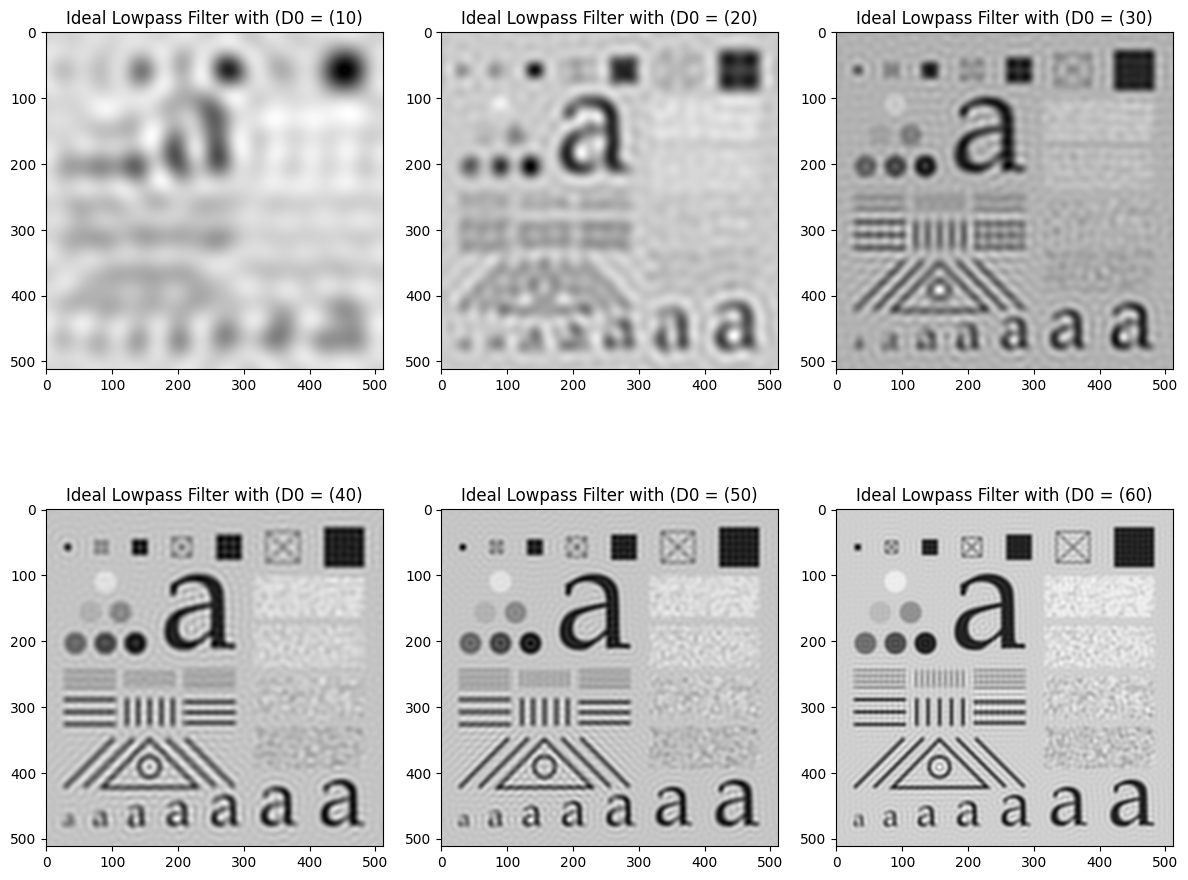

In [214]:
cutoff_frequency = 10
plt.figure(figsize=(12, 10))

for i in range(1, 7):
    idel_lowpass_filtered_image = idel_lowpass_filter(gray_image, i*cutoff_frequency)

    plt.subplot(2, 3, i)
    plt.imshow(idel_lowpass_filtered_image, cmap='gray')
    plt.title(f"Ideal Lowpass Filter with (D0 = ({i*cutoff_frequency})")

plt.tight_layout()
plt.show()
